<a href="https://colab.research.google.com/github/DaehwanCho/tensorflow_tech/blob/main/TechDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# from google.colab import files
# myfile = files.upload()

In [42]:
import io
import pandas as pd

In [43]:
# myfile

In [ ]:
data = pd.read_csv(io.BytesIO(myfile['카테고리 매칭(수정) - total.csv']))

In [ ]:
data.head()

idx  분야 카테고리          depth1            depth2              depth2_address  \
0    1  뷰티   기초  "Beauty-cat":       Skincare-cat       Skincare-cat.11036328   
1    2  뷰티   기초  "Beauty-cat":       Skincare-cat       Skincare-cat.11060033   
2    3  뷰티   기초  "Beauty-cat":   Beauty-Tools-cat   Beauty-Tools-cat.11060026   
3    4  뷰티   기초  "Beauty-cat":      Skin-care-cat      Skin-care-cat.11056754   
4    5  뷰티   기초  "Beauty-cat":       Skincare-cat       Skincare-cat.11075457   

  depth1_name  depth1_code   depth2_name  depth2_code country  \
0      Beauty     11036279      Skincare     11036328      vn   
1      Beauty     11059974      Skincare     11060033      br   
2      Beauty     11059974  Beauty-Tools     11060026      br   
3     Beauty      11056740     Skin-care     11056754      mx   
4     Beauty      11075412      Skincare     11075457      pl   

   jfun_depth_code_1  jfun_depth_code_2  
0                1.0                2.0  
1                1.0                2.0  
2                1.0                2.0  
3                1.0                2.0  
4                1.0                2.0

# 경사하강법

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.random.rand(100)
Y = 0.2 * X * 0.5

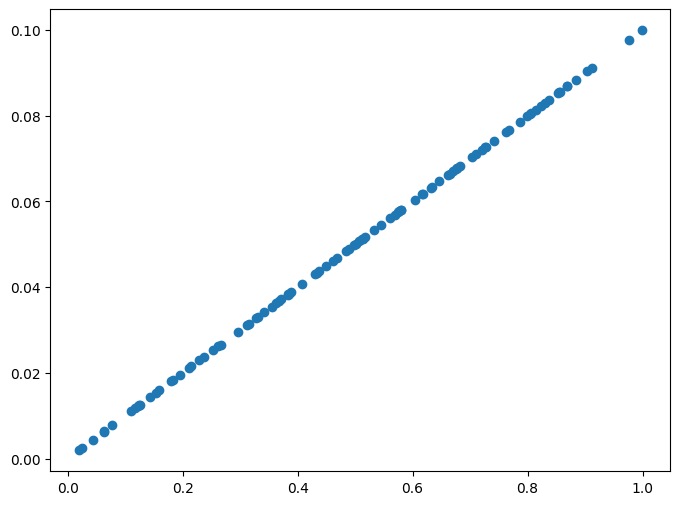

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y)
plt.show()

In [ ]:
def plot_prediction(pred, y):
  plt.figure(figsize=(8, 6))
  plt.scatter(X, y)
  plt.scatter(X, pred)
  plt.show()

## Gradient Descent 구현

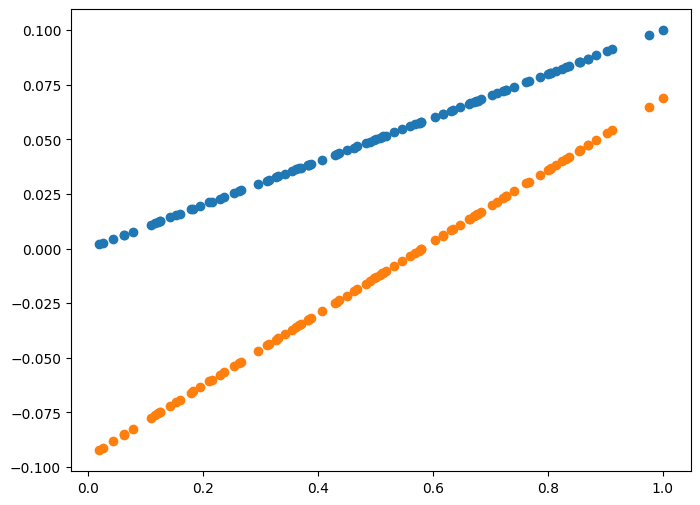

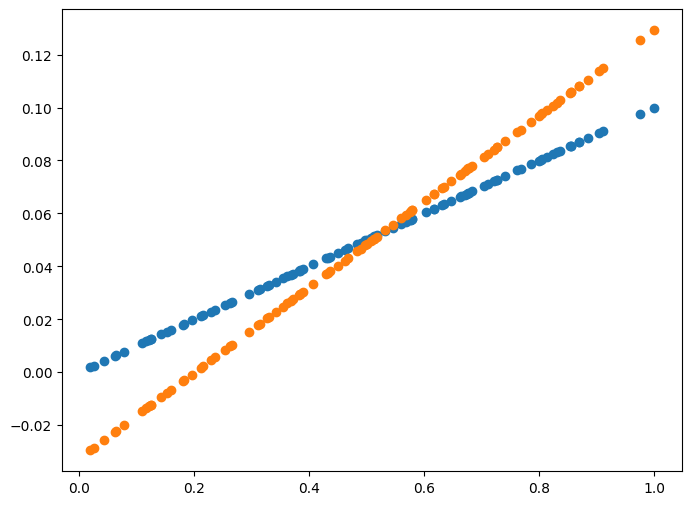

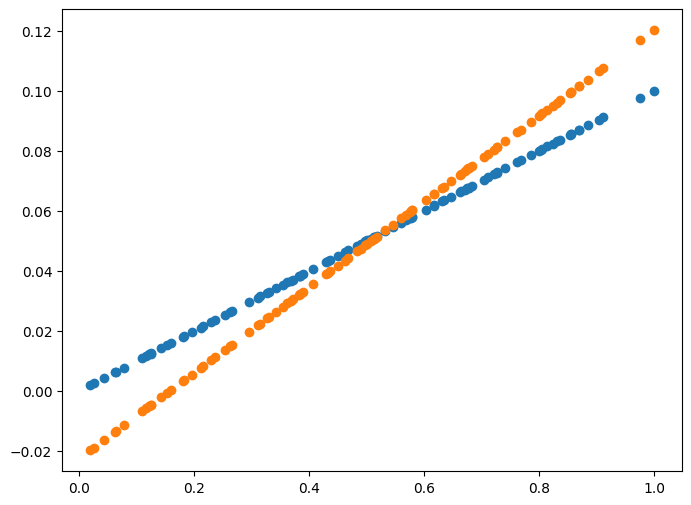

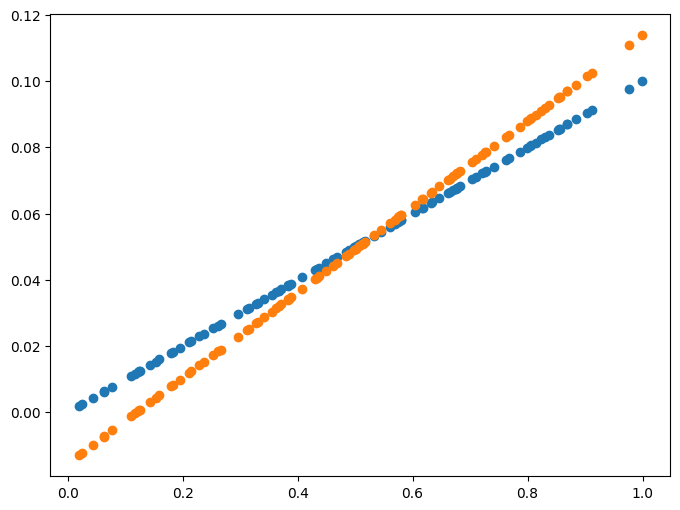

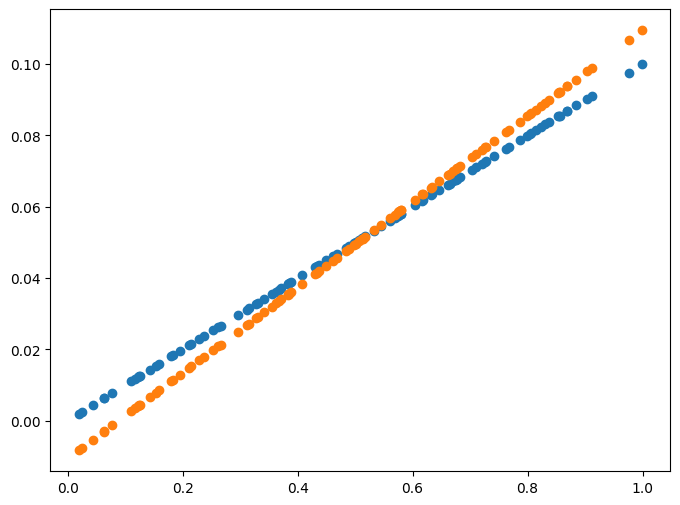

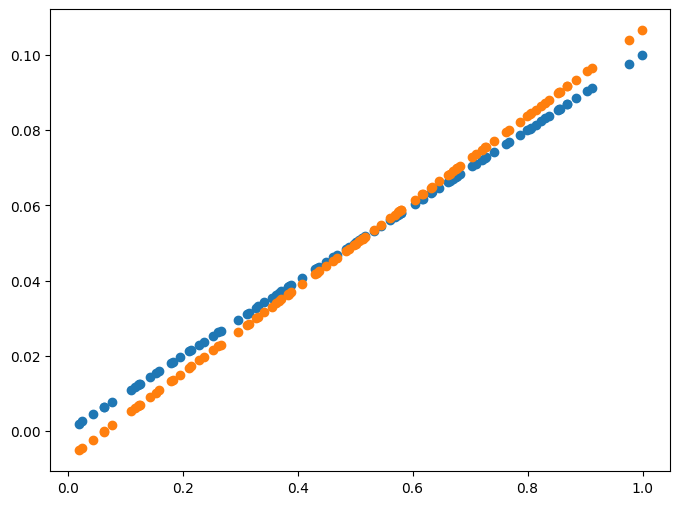

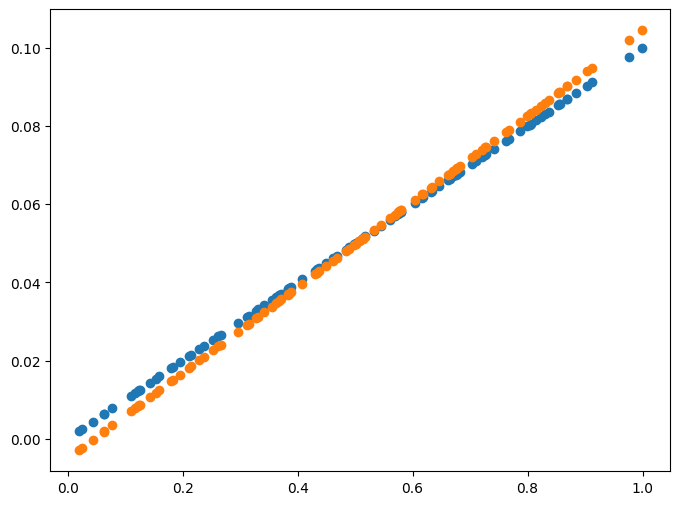

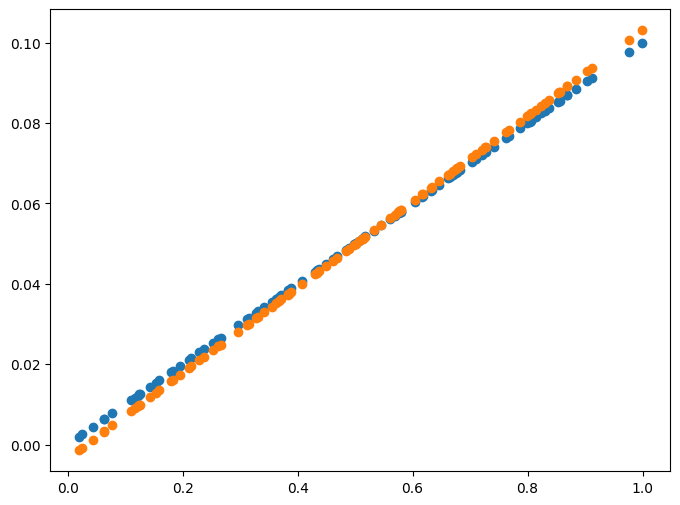

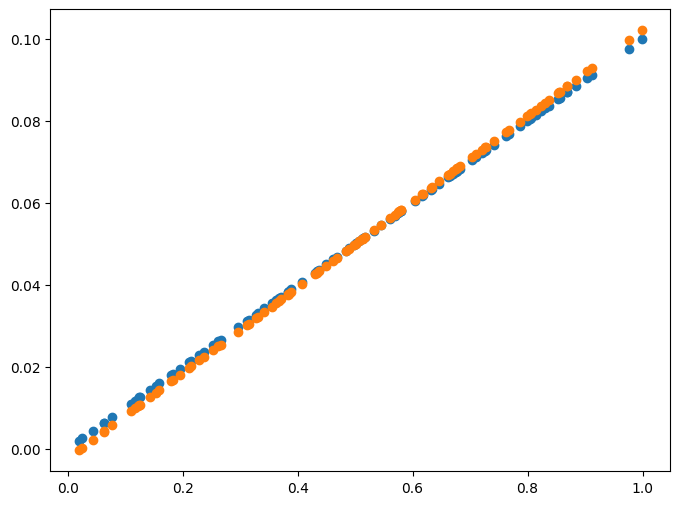

In [ ]:
W1 = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

learning_rate = 0.7

for epoch in range(200):
  Y_Pred = W * X + b

  error = np.abs(Y_Pred - Y).mean()
  if error < 0.001:
    break
  
  # gradient descent 계산
  w_grad = learning_rate * ((Y_Pred - Y) * X).mean()
  b_grad = learning_rate * (Y_Pred - Y).mean()

  # W, b 값 갱신
  W = W - w_grad
  b = b - b_grad

  if epoch % 10 == 0:
    Y_Pred = W * X + b
    plot_prediction(Y_Pred, Y)


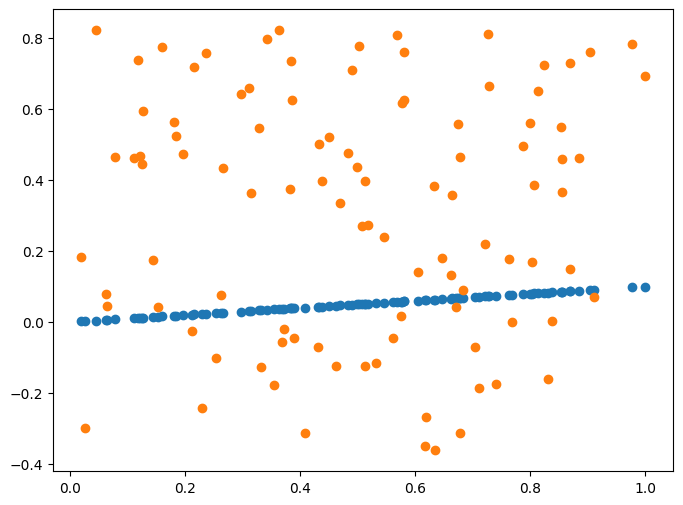

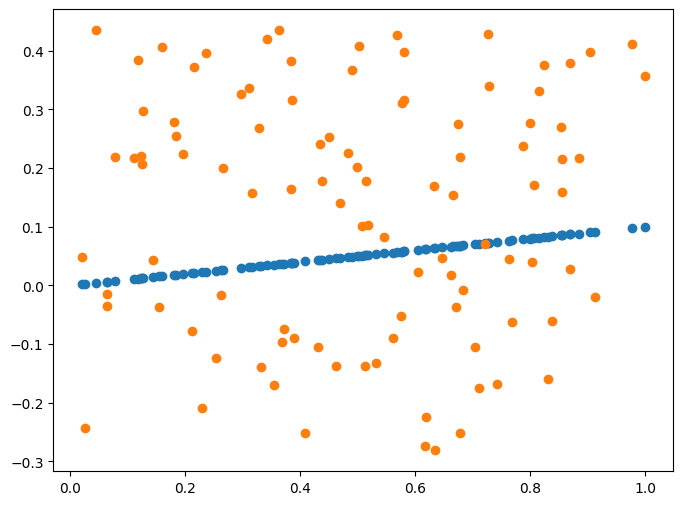

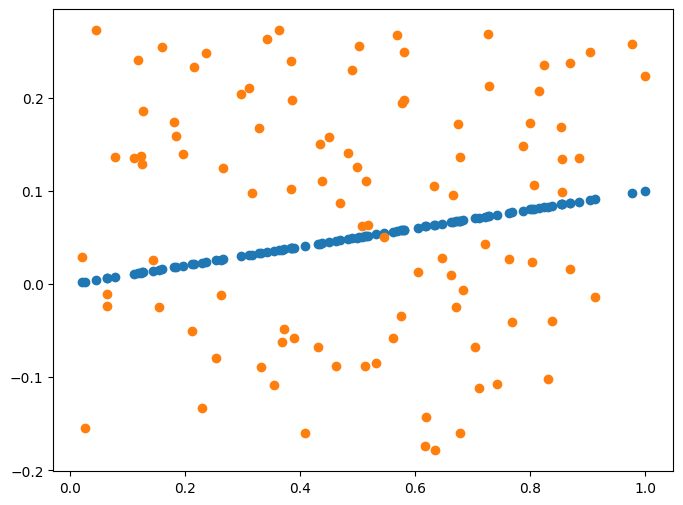

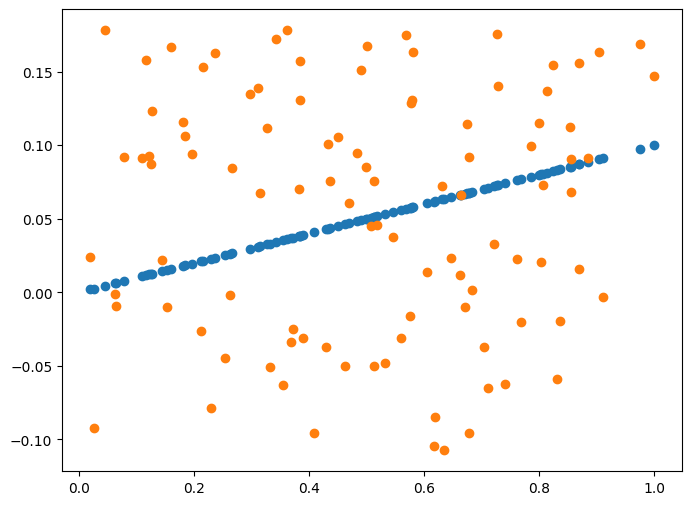

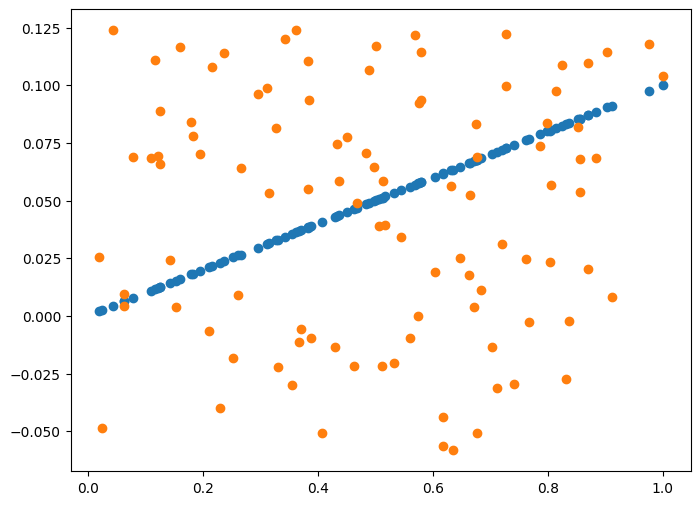

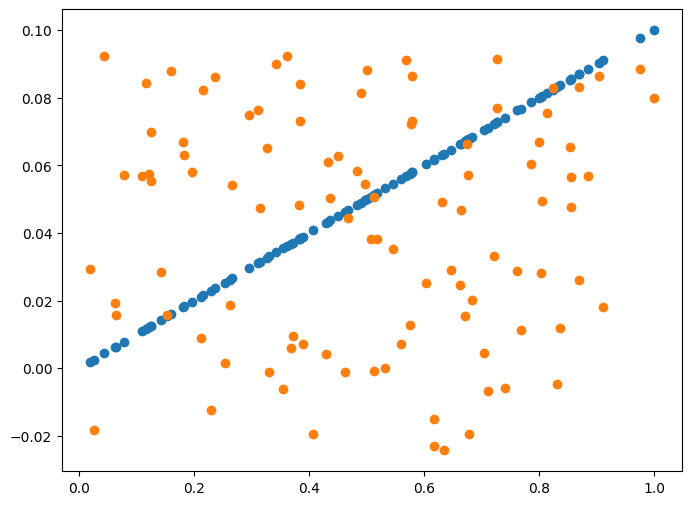

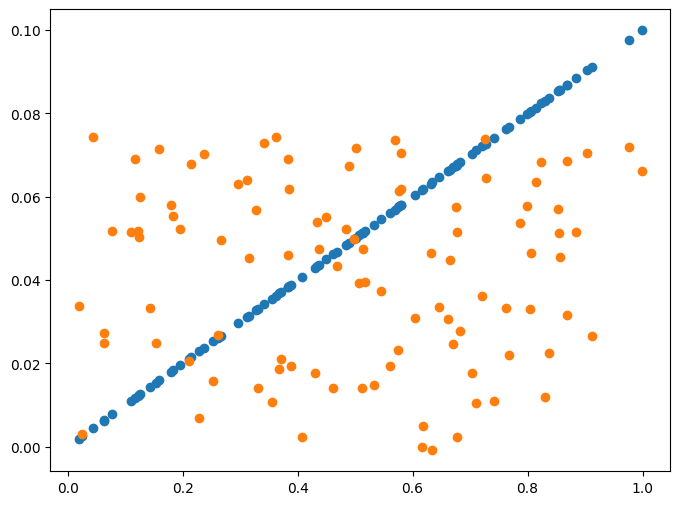

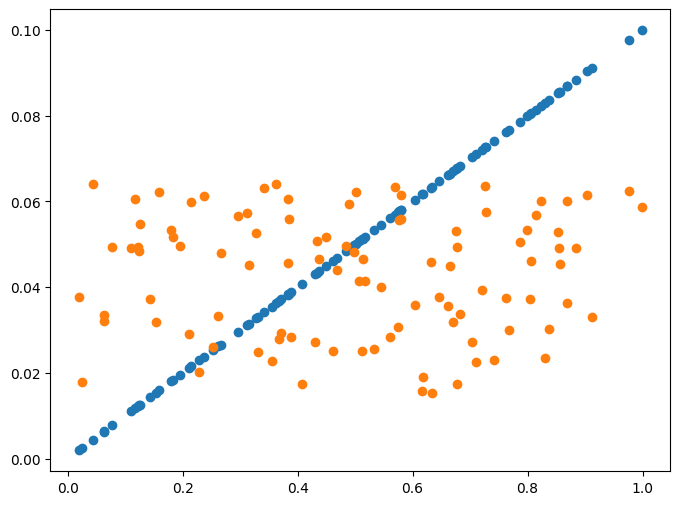

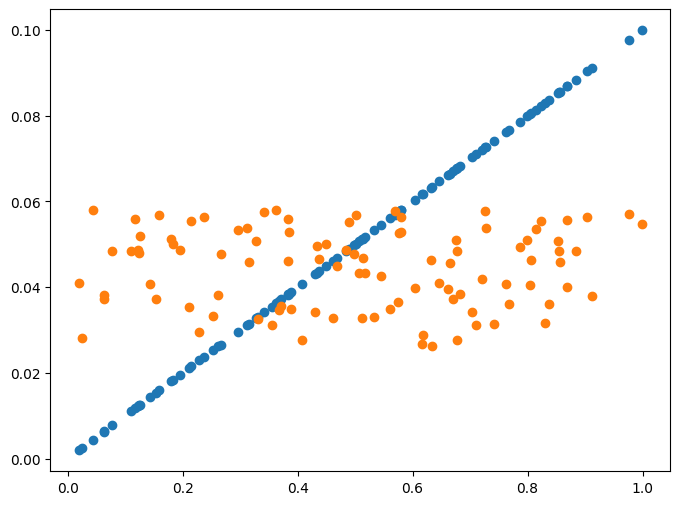

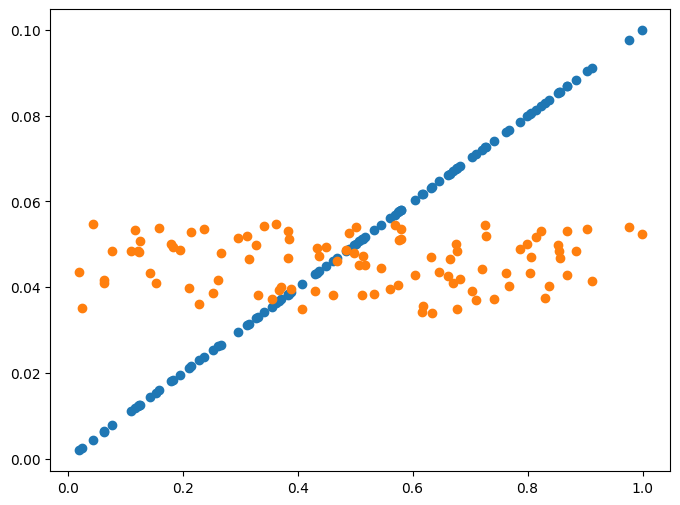

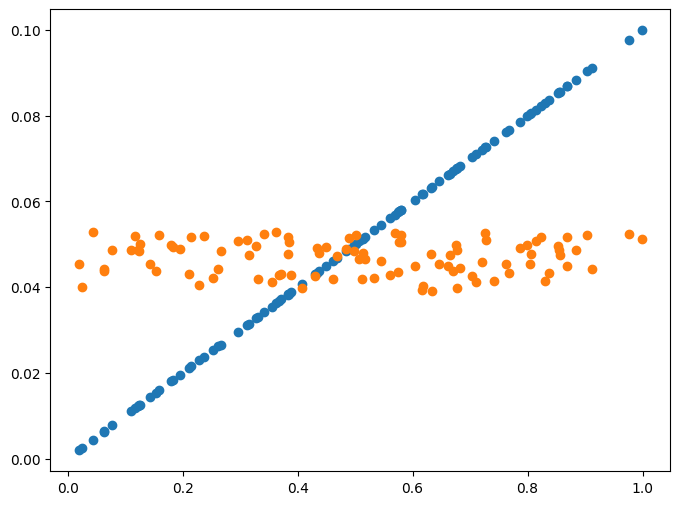

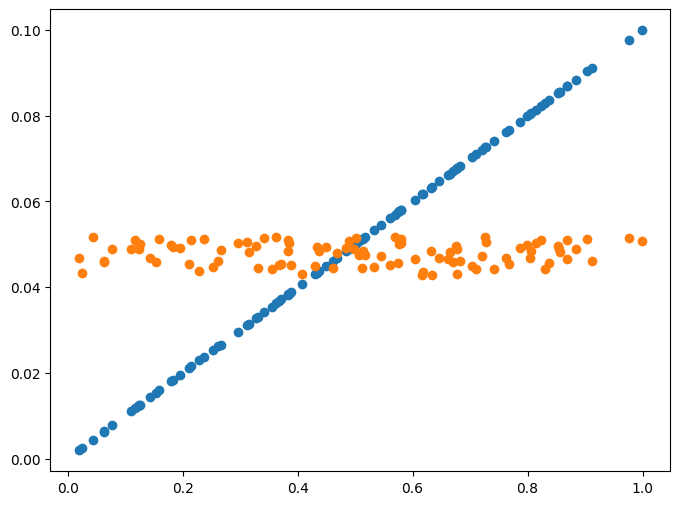

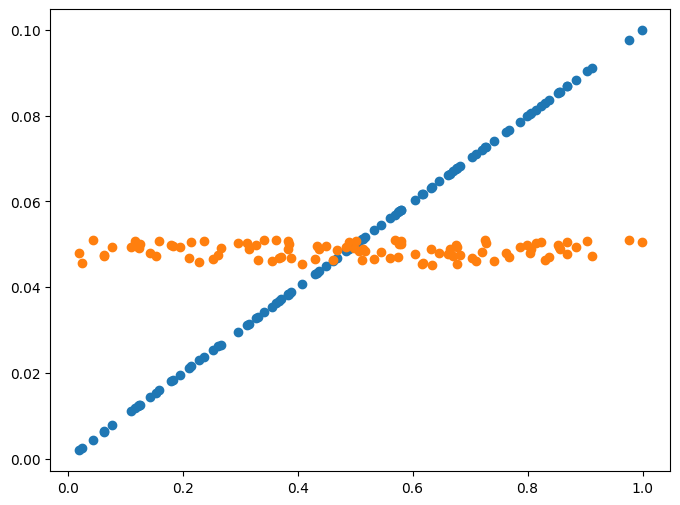

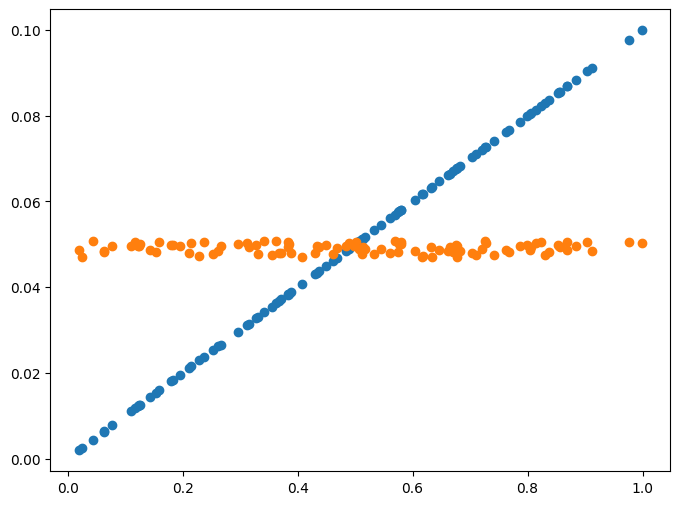

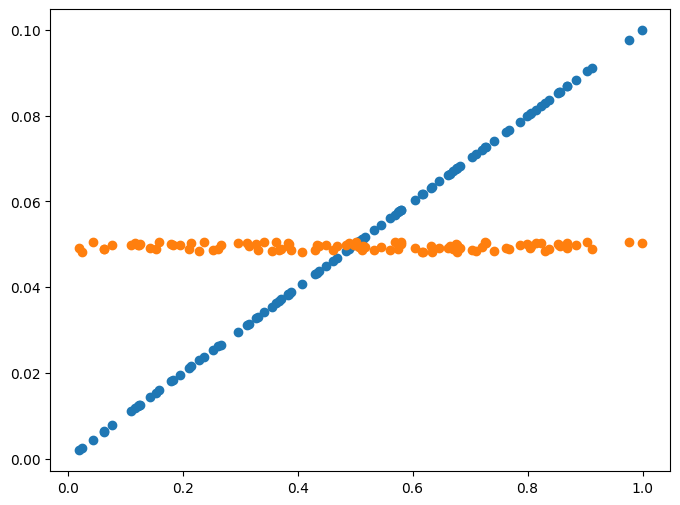

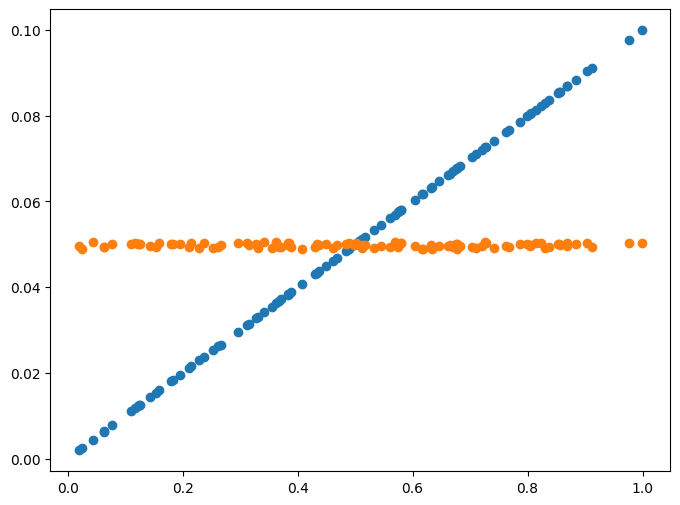

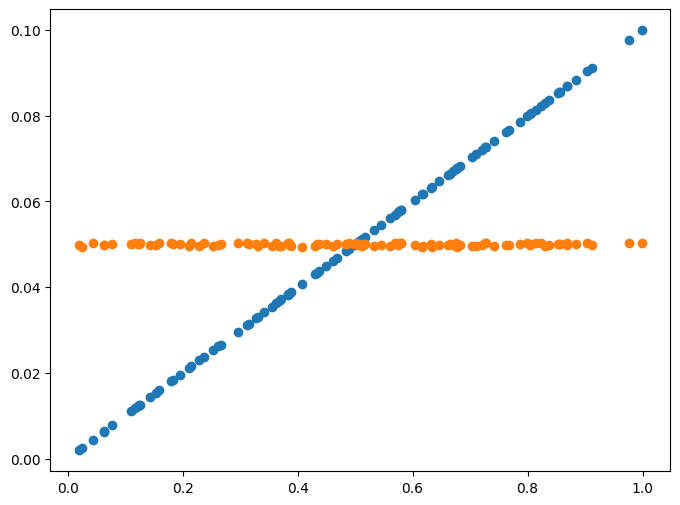

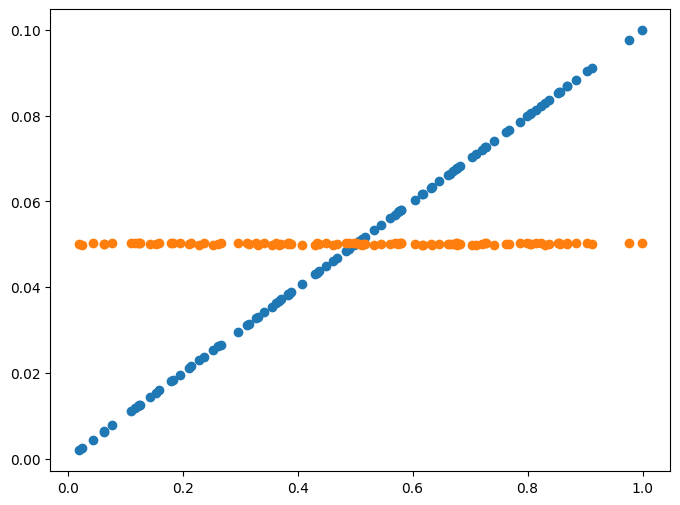

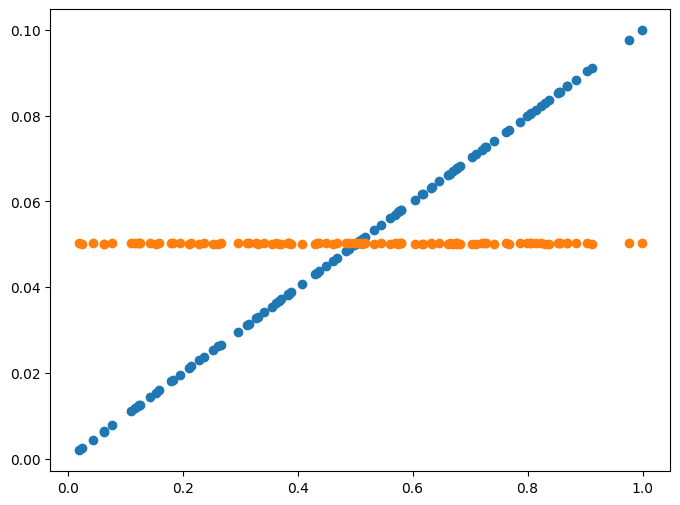

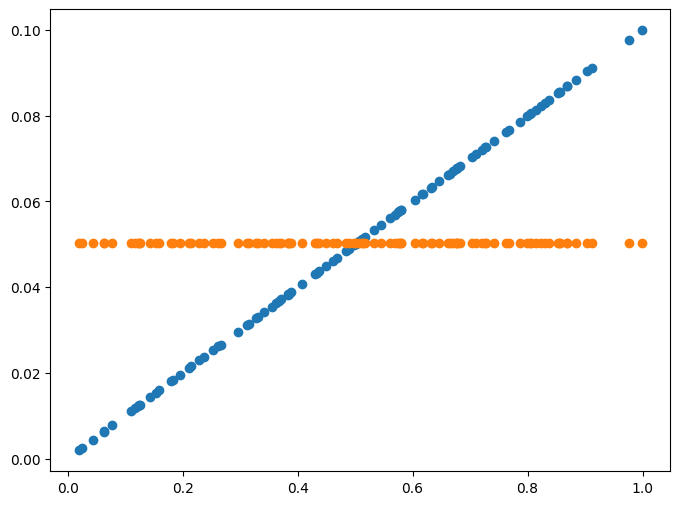

In [ ]:
W1 = np.random.uniform(-1, 1)
W2 = np.random.uniform(-1, 1)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
b = np.random.uniform(-1, 1)

learning_rate = 0.7

for epoch in range(600):
  Y_Pred = W1 * X1 + W2 * X2 + b

  error = np.abs(Y_Pred - Y).mean()
  if error < 0.001:
    break
  
  # gradient descent 계산
  w1_grad = learning_rate * ((Y_Pred - Y) * X1).mean()
  w2_grad = learning_rate * ((Y_Pred - Y) * X2).mean()
  b_grad = learning_rate * (Y_Pred - Y).mean()

  # W, b 값 갱신
  W1 = W1 - w1_grad
  W2 = W2 - w2_grad
  b = b - b_grad

  if epoch % 10 == 0:
    Y_Pred = W1 * X1 + W2 * X2 + b
    plot_prediction(Y_Pred, Y)


## tensorflow dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
train_datasets = tfds.load('cifar10', split='train')
valid_datasets = tfds.load('cifar10', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete9DT7T7/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete9DT7T7/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
train_datasets

<_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
for data in train_datasets.take(5):
  image = tf.cast(data['image'], tf.float32) / 255.0
  label = data['label']
  print(data['image'].shape)
  print(data['label'])

(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(8, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(6, shape=(), dtype=int64)


In [ ]:
def preprocessing(data):
  image = tf.cast(data['image'], tf.float32) / 255.0
  label = data['label']
  return image, label

In [ ]:
BATCH_SIZE = 128
train_data = train_datasets.map(preprocessing).shuffle(1000).batch(BATCH_SIZE)
valid_data = valid_datasets.map(preprocessing).shuffle(1000).batch(BATCH_SIZE)

In [ ]:
for image, label in train_data.take(1):
  print(image.shape)
  print(label.shape)

(128, 32, 32, 3)
(128,)


## mnist_classification_using_ann

In [16]:
import tensorflow as tf

import numpy as np

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [18]:
x_train, x_test = np.array(x_train, dtype=np.float32), np.array(x_test, dtype=np.float32)

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [21]:
28 * 28

784

In [22]:
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

In [23]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [24]:
x_train, x_test = x_train / 255., x_test / 255.

In [25]:
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

In [26]:
y_train[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [27]:
y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [28]:
learning_rate = 0.001
num_epochs = 30
batch_size = 256
display_step = 1
input_size = 784
hidden1_size = 256
hidden2_size = 256
output_size = 10

In [29]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

In [30]:
def random_normal_initializer_with_stddev_1():
  return tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)

In [31]:
class ANN(tf.keras.Model):
  def __init__(self):
    super(ANN, self).__init__()
    self.hidden_layer_1 = tf.keras.layers.Dense(hidden1_size,
                                                activation='relu',
                                                kernel_initializer=random_normal_initializer_with_stddev_1(),
                                                bias_initializer=random_normal_initializer_with_stddev_1())
    self.hidden_layer_2 = tf.keras.layers.Dense(hidden2_size,
                                                activation='relu',
                                                kernel_initializer=random_normal_initializer_with_stddev_1(),
                                                bias_initializer=random_normal_initializer_with_stddev_1())
    self.output_layer = tf.keras.layers.Dense(output_size,
                                                activation=None,
                                                kernel_initializer=random_normal_initializer_with_stddev_1(),
                                                bias_initializer=random_normal_initializer_with_stddev_1())
    
  def call(self, x):
    H1_output = self.hidden_layer_1(x)
    H2_output = self.hidden_layer_2(H1_output)
    logits = self.output_layer(H2_output)

    return logits

In [32]:
@tf.function
def cross_entropy_loss(logits, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [33]:
optimizer = tf.optimizers.Adam(learning_rate)

In [34]:
@tf.function
def train_step(model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [35]:
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

In [38]:
ANN_model = ANN()

for epoch in range(num_epochs):
  average_loss = 0.
  total_batch = int(x_train.shape[0] / batch_size)

  for batch_x, batch_y in train_data:
    _, current_loss = train_step(ANN_model, batch_x, batch_y), cross_entropy_loss(ANN_model(batch_x), batch_y)
    average_loss += current_loss / total_batch
  if epoch % display_step == 0:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch + 1), average_loss))

print("정확도(Accuracy): %f" % compute_accuracy(ANN_model(x_test), y_test))

반복(Epoch): 1, 손실 함수(Loss): 240.994827
반복(Epoch): 2, 손실 함수(Loss): 62.388515
반복(Epoch): 3, 손실 함수(Loss): 40.283340
반복(Epoch): 4, 손실 함수(Loss): 29.482910
반복(Epoch): 5, 손실 함수(Loss): 22.667854
반복(Epoch): 6, 손실 함수(Loss): 18.089397
반복(Epoch): 7, 손실 함수(Loss): 14.438625
반복(Epoch): 8, 손실 함수(Loss): 11.876000
반복(Epoch): 9, 손실 함수(Loss): 9.725401
반복(Epoch): 10, 손실 함수(Loss): 7.995494
반복(Epoch): 11, 손실 함수(Loss): 6.566756
반복(Epoch): 12, 손실 함수(Loss): 5.373870
반복(Epoch): 13, 손실 함수(Loss): 4.361870
반복(Epoch): 14, 손실 함수(Loss): 3.574627
반복(Epoch): 15, 손실 함수(Loss): 2.800494
반복(Epoch): 16, 손실 함수(Loss): 2.326342
반복(Epoch): 17, 손실 함수(Loss): 1.850943
반복(Epoch): 18, 손실 함수(Loss): 1.457654
반복(Epoch): 19, 손실 함수(Loss): 1.122737
반복(Epoch): 20, 손실 함수(Loss): 0.868313
반복(Epoch): 21, 손실 함수(Loss): 0.690819
반복(Epoch): 22, 손실 함수(Loss): 0.511173
반복(Epoch): 23, 손실 함수(Loss): 0.413609
반복(Epoch): 24, 손실 함수(Loss): 0.296579
반복(Epoch): 25, 손실 함수(Loss): 0.238892
반복(Epoch): 26, 손실 함수(Loss): 0.186123
반복(Epoch): 27, 손실 함수(Loss): 0.131097
반